In [10]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'svg'
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.weight'] = 'ultralight'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

In [11]:
# Исходные данные для выполнения ДЗ

a_t=2.2 # Размер танка a
b_t=1.7 # Размер танка b

a=2.4 # Размер САУ a
b=2.2 # Размер САУ b

n_100t=14 # Скорострельность, 1/мин
n_100=10 # Скоростельность, 1/мин
n_152=9 # Скоростельность, 1/мин

PTRK_type='ком' # Тип ПТРК

X_0=2800 # Начальное расстояние
omega_100t=1.5 # Среднее число попаданий, необходимое для поражения целей
omega_100=1.6 # Среднее число попаданий, необходимое для поражения целей
omega_152=1.1 # Среднее число попаданий, необходимое для поражения целей
omega_PTUR=1.3 # Среднее число попаданий, необходимое для поражения целей

V_t=9 # Скорость танка
V_PTUR=260 # Скорость ПТУР
t_0=4 # Время, спустя которое в работу включается Т

ExX_100t=1/900 # Характеристики рассеивания
ExX_100=1/1400 # Характеристики рассеивания
ExX_152=1/800 # Характеристики рассеивания
ExX_PTUR=1/1700 # Характеристики рассеивания

# # Исходные данные для выполнения ДЗ

# a_t=3 # Размер танка a
# b_t=2.1 # Размер танка b

# a=2.8 # Размер САУ a
# b=1.9 # Размер САУ b

# n_100t=12 # Скорострельность, 1/мин
# n_100=11 # Скоростельность, 1/мин
# n_152=6 # Скоростельность, 1/мин

# PTRK_type='ком' # Тип ПТРК

# X_0=2000 # Начальное расстояние
# omega_100t=1.8 # Среднее число попаданий, необходимое для поражения целей
# omega_100=1.6 # Среднее число попаданий, необходимое для поражения целей
# omega_152=1.1 # Среднее число попаданий, необходимое для поражения целей
# omega_PTUR=1.2 # Среднее число попаданий, необходимое для поражения целей

# V_t=16 # Скорость танка
# V_PTUR=170 # Скорость ПТУР
# t_0=4 # Время, спустя которое в работу включается Т

# ExX_100t=1/1500 # Характеристики рассеивания
# ExX_100=1/600 # Характеристики рассеивания
# ExX_152=1/1000 # Характеристики рассеивания
# ExX_PTUR=1/2000 # Характеристики рассеивания

In [12]:
def get_F_x(x):
    """
    Функция Лапласса
        Аргументы:
            -x (flaot) - аргумент функции
        Результат:
            -Ф(х) (float) - значение функции Лапласса для аргумента х
    """
    return scipy.stats.norm.cdf(x)-0.5

def get_sigma(x, E_x):
    """
    Среднее квадратическое отклонение в зависимости от дальности
        Аргументы:
            - x (float) - дальность;
            - E_x (float) - характеристика рассеивания;
        Резульат:
            - sigma (float) - значение среднеквадратического отклонения
    """
    return 1.48*E_x*x

def get_P(a,b,E_x,x):
    """
    Вероятность попадания при одном выстреле
        Аргументы:
            - a (float) - размер а;
            - b (float) - размер b;
            - E_x (float) - характеристика рассеивания;
            - x (float) - дальность;
        Результаты:
            - P (float) - вероятность попадания при одном выстреле.
    """
    P=4*get_F_x((b/2)/get_sigma(x,E_x))*get_F_x((a/2)/get_sigma(x,E_x))
    return P

def get_W(a,b,E_x,x,omega):
    return get_P(a,b,E_x,x)/omega

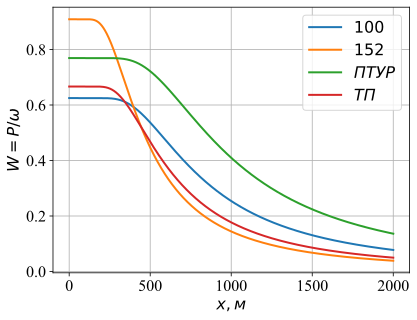

In [13]:
# Графики зависимости вероятности поражения от расстояния

X=np.linspace(0.01, 2e3, 1000)
plt.plot(X, get_W(a_t,b_t,ExX_100,X,omega_100), label='$100$', lw=2)
plt.plot(X, get_W(a_t,b_t,ExX_152,X,omega_152), label='$152$', lw=2)
plt.plot(X, get_W(a_t,b_t,ExX_PTUR,X,omega_PTUR), label='$ПТУР$', lw=2)
plt.plot(X, get_W(a,b,ExX_100t,X,omega_100t), label='$ТП$', lw=2)
plt.xlabel('$x, м$')
plt.ylabel('$W=P/\omega$')
plt.legend(loc='best')
plt.grid()
plt.show()

In [14]:
# Таблица W(P)
x_df=np.linspace(2800,0, round((2800-0)/100+1)) # Массив значений расстояний
sigma_100_df=[]
sigma_152_df=[]
sigma_100t_df=[]
F_a_100_df=[]
F_b_100_df=[]
F_a_152_df=[]
F_b_152_df=[]
F_a_100t_df=[]
F_b_100t_df=[]
W_100_df=[]
W_152_df=[]
W_100t_df=[]

for i in range(len(x_df)):
    if x_df[i]==0:
        x_df[i]=1e-7
    sigma_100_df.append(1.48*ExX_100*x_df[i])
    sigma_152_df.append(1.48*ExX_152*x_df[i])
    sigma_100t_df.append(1.48*ExX_100t*x_df[i])
    F_a_100_df.append(get_F_x(0.5*a_t/(1.48*ExX_100*x_df[i])))
    F_b_100_df.append(get_F_x(0.5*b_t/(1.48*ExX_100*x_df[i])))
    F_a_152_df.append(get_F_x(0.5*a_t/(1.48*ExX_152*x_df[i])))
    F_b_152_df.append(get_F_x(0.5*b_t/(1.48*ExX_152*x_df[i])))
    F_a_100t_df.append(get_F_x(0.5*a/(1.48*ExX_100t*x_df[i])))
    F_b_100t_df.append(get_F_x(0.5*b/(1.48*ExX_100t*x_df[i])))
    W_100_df.append(get_W(a_t,b_t,ExX_100,x_df[i],omega_100))
    W_152_df.append(get_W(a_t,b_t,ExX_152,x_df[i],omega_152))
    W_100t_df.append(get_W(a,b,ExX_100t,x_df[i],omega_100t))

# Запись в таблицу
df_W = pd.DataFrame()
df_W['x,м']=x_df
df_W['sigma_100']=sigma_100_df
df_W['sigma_152']=sigma_152_df
df_W['sigma_100t']=sigma_100t_df
df_W['F_a_100']=F_a_100_df
df_W['F_b_100']=F_b_100_df
df_W['F_a_152']=F_a_152_df
df_W['F_b_152']=F_b_152_df
df_W['F_a_100t']=F_a_100t_df
df_W['F_b_100t']=F_b_100t_df
df_W['W_100']=W_100_df
df_W['W_152']=W_152_df
df_W['W_100t']=W_100t_df

# Отображение таблицы
pd.options.display.float_format = '{:,.3f}'.format
df_W

,"x,м",sigma_100,sigma_152,sigma_100t,F_a_100,F_b_100,F_a_152,F_b_152,F_a_100t,F_b_100t,W_100,W_152,W_100t
0,"2,800.000",2.960,5.180,4.604,0.145,0.113,0.084,0.065,0.103,0.094,0.041,0.020,0.026
1,"2,700.000",2.854,4.995,4.440,0.150,0.117,0.087,0.068,0.107,0.098,0.044,0.021,0.028
2,"2,600.000",2.749,4.810,4.276,0.155,0.121,0.090,0.070,0.111,0.102,0.047,0.023,0.030
3,"2,500.000",2.643,4.625,4.111,0.161,0.126,0.094,0.073,0.115,0.105,0.051,0.025,0.032
4,"2,400.000",2.537,4.440,3.947,0.168,0.131,0.098,0.076,0.119,0.110,0.055,0.027,0.035
5,"2,300.000",2.431,4.255,3.782,0.175,0.137,0.102,0.079,0.124,0.114,0.060,0.029,0.038
6,"2,200.000",2.326,4.070,3.618,0.182,0.143,0.107,0.083,0.130,0.119,0.065,0.032,0.041
7,"2,100.000",2.220,3.885,3.453,0.190,0.149,0.111,0.087,0.136,0.125,0.071,0.035,0.045
8,"2,000.000",2.114,3.700,3.289,0.199,0.156,0.117,0.091,0.142,0.131,0.078,0.039,0.050
9,"1,900.000",2.009,3.515,3.124,0.208,0.164,0.123,0.096,0.150,0.138,0.085,0.043,0.055


In [15]:
# # Дуэль Т и САУ с 100-мм ПТП
def duel(first_par : dict, sec_par : dict):
    # массив времен
    ts = [0]

    # относительная скорость
    V_otn = first_par['V'] + sec_par['V']

    # расстояние
    x = X_0

    # массив кто выстрелил
    who_shot = ['танк']

    # моменты времени выстрелов 1 и 2 боевых единиц
    t_tank = 0, t_sau = 0

    # W и V с тильдами
    W_tilds = [W], V_tilds = []

    # W и V
    Ws = [W], Vs = []

    # произведение 1 - W (или 1 - V)
    WV_minus_1 = 1 - Ws[-1]

    while Ws[-1] + Vs[-1] != 1 or x <= 0 or : # боекомплект?
        # время выстрелов
        t_tank += 1 / first_par['n'] * 60
        t_sau += 1 / sec_par['n'] * 60
        
        # выстреливает 1 боевая единица
        if t_tank < t_sau:
            ts.append(t_tank) 
            who_shot.append('1')
            x -= V_otn * ts[-1]
            t_sau -= 1 / sec_par['n'] * 60     # возвращаем время танку
            Ws.append(get_W(first_par['a'],first_par['b'],first_par['E'],x,first_par['omega']))
            W_tilds.append(W_tilds[-1] + WV_minus_1 * Ws[-1])
            WV_minus_1 *= 1 - Ws[-1]
        
        # выстреливает 2 боевая единица
        elif t_tank > t_sau:
            ts.append(t_sau)
            who_shot.append('2')
            x -= V_otn * ts[-1]
            t_tank -= 1 / first_par['n'] * 60   # возвращаем время САУ
            Vs.append(get_W(sec_par['a'],sec_par['b'],sec_par['E'],x,sec_par['omega']))
            V_tilds.append(V_tilds[-1] + WV_minus_1 * Vs[-1])
            WV_minus_1 *= 1 - Vs[-1]

        # выстрелили оба
        else:
            ts.append(t_tank)
            who_shot.append('оба')
            x -= V_otn * ts[-1]
            Ws.append(get_W(first_par['a'],first_par['b'],first_par['E'],x,first_par['omega']))
            Vs.append(get_W(sec_par['a'],sec_par['b'],sec_par['E'],x,sec_par['omega']))
            W_tilds.append(W_tilds[-1] + WV_minus_1 * Ws[-1] * (1 + (1 - Vs[-1]) / 2))
            V_tilds.append(W_tilds[-1] + WV_minus_1 * Vs[-1] * (1 + (1 - Ws[-1]) / 2))
            WV_minus_1 *= (1 - Ws[-1]) * (1 - Vs[-1])

    return {
        't': ts,
        'who': who_shot,
        'W_tild': W_tilds,
        'V_tild': V_tilds
    }

# def get_X_tek(t, X_0, v_t):
#     """
#     Расстояние между машинами
#         Аргументы:
#             -t (float) - время движения;
#             -X_0 (float) - начальное расстояние;
#             -v_t (float) - скорость сближения;
#         Результат:
#             -X (float) - текущее положение.
#     """
#     return X_0-v_t*t

# delta_t_100=60/n_100 # Время, через которое САУ делает выстрел
# delta_t_100t=60/n_100t # Время, через котрое Т делает выстрел

# t_T_SAU=np.linspace(0, 110)
# t_100ti=np.linspace(0, 25*delta_t_100t, round((25*delta_t_100t-0)/delta_t_100t)+1) # моменты времени + 4с, в котороые стреляет Т
# t_100i=np.linspace(0, 18*delta_t_100, (round(25*delta_t_100/delta_t_100)+1)) # моменты времени, в которые стреляет САУ

# # Вероятность поражения танка при i-м выстреле
# W_i = get_W(a_t,b_t,ExX_100,get_X_tek(t_100i, X_0, V_t),omega_100)

# # Вероятность поражения САУ при i-м выстреле
# V_i = get_W(a,b,ExX_100t,get_X_tek(t_100ti, X_0, V_t),omega_100t)

In [16]:
# # Посследовательность выстрелов и расстояние от времени

# fig, ax1 = plt.subplots(figsize=(10, 5))
# ax1.plot(t_T_SAU, get_X_tek(t_T_SAU, X_0, V_t), lw=2, color='black', label='$X(t)$')
# ax1.set_xlabel('$t,c$')
# ax1.set_ylabel('$X, м$')
# ax1.grid()
# ax1.legend(loc='lower left')
# ax2 = ax1.twinx()
# ax2.scatter(t_0+t_100ti, np.linspace(0,0, len(t_0+t_100ti)), color='blue', label='$Т$')
# ax2.scatter(t_100i, np.linspace(1,1, len(t_100i)), color='red', marker='^', label='$САУ$')
# ax2.set_yticks([-1,0,1,2]);
# ax2.legend(loc='best');

In [17]:
# df_T_vs_SAU = pd.DataFrame()
# shots=np.linspace(0, 100, 101)
# i=1
# W1=get_W(a_t,b_t,ExX_100,get_X_tek(0, X_0, V_t),omega_100)
# V1=get_W(a,b,ExX_100t,get_X_tek(t_0, X_0, V_t),omega_100t)
# W1_=W1
# V1_=(1-W1)*V1
# Wi_=W1
# Wi_min1_=0
# Vi_=V1_
# Vi_min1_=0
# t_shot_SAU_1=shots[0]*delta_t_100 # время в которое происходит выстрел САУ
# t_shot_t_1=4+shots[0]*delta_t_100
# W_V=['W', 'V']
# n_shots=[1,1]
# t_shots=[t_shot_SAU_1, t_shot_t_1]
# P_array=[(1-W1),(1-W1-V1)]
# Krit_1=[1,1]
# Krit_2=[1,1]
# p=1
# print('Vi_ = ',round(Vi_, 3), 't = ', t_shot_t_1)
# print('Wi_ = ',round(Wi_, 3), 'i = ', t_shot_SAU_1)
# while ((Wi_- Wi_min1_)/Wi_ > 0.01) or ((Vi_- Vi_min1_)/Vi_ > 0.01):
#     t_shot_SAU=shots[i]*delta_t_100 # время в которое происходит выстрел САУ
#     t_shot_t=4+shots[i]*delta_t_100t # время в которое происходит выстрел Т
#     Wi_min1=Wi
#     Vi_min1=Vi
#     Wi=get_W(a_t,b_t,ExX_100,get_X_tek(t_shot_SAU, X_0, V_t),omega_100)
#     Vi=get_W(a,b,ExX_100t,get_X_tek(t_shot_t, X_0, V_t),omega_100t)
#     Wi_min1_=Wi_
#     Wi_=Wi_min1_+p*(1-Wi_min1)*(1-Vi_min1)
#     Vi_min1_=Vi_
#     Wip1=get_W(a_t,b_t,ExX_100,get_X_tek(t_shot_SAU, X_0, V_t),omega_100)
#     Vi_=Vi_min1_+p*(1-Wi_min1)*(1-Vi_min1)*(1-Wi)*Vi
#     p=(1-Wi_min1)*(1-Vi_min1)*p
    
#     print('Vi_ = ',round(Vi_, 3), 't = ', t_shot_t)
#     print('Wi_ = ',round(Wi_, 3), 'i = ', t_shot_SAU)
#     i=i+1

#     # if t_shot_SAU>t_shot_t:
#     #     W_V.append('W')
#     #     n_shots.append()

In [18]:
# Дуэль танка и САУ с 100 мм ПТП

flag = 0
i = 0
N_tank_i = n_t

NameError: name 'n_t' is not defined